# Word Embeddings using gensim
https://radimrehurek.com/gensim/index.html

## Step 1: Data import and preparation

In [ ]:
# import packages
import pandas as pd
import numpy as np
import nltk

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p

In [ ]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from afinn import Afinn

tweets_data_path = 'covid19aa' #set this to your filename
tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        if 'created_at' in line:
             tweet = json.loads(line)
             if 'retweeted_status' in tweet:
                  tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data)) #this is how many tweets we recovered from the file

In [5]:
tweets = pd.DataFrame()
#ADD columns to dataframe
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
#tweets['screen name'] = list(map(lambda tweet: tweet['screen name'], tweets_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], tweets_data))
#tweets['hashtags'] = list(map(lambda tweet: tweet['hashtags'], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['user']['location'] if tweet['user'] is not None else None, tweets_data))

tweets['favorite_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['favorite_count']), tweets_data))
tweets['retweet_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['retweet_count']), tweets_data))


afinn = Afinn(emoticons=True)
tweets['sentiment'] = list(map(lambda tweet: afinn.score(tweet['text']), tweets_data ))

tweets['created'] = list(map(lambda tweet: tweet['created_at'], tweets_data))

tweets_en = tweets[tweets.lang == 'en']
tweets_en.head()

,text,lang,source,country,favorite_count,retweet_count,sentiment,created
0,RT @balazscseko: Hungarian Parliament passes b...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,16276,13481,-2.0,Sun Apr 05 00:22:09 +0000 2020
2,RT @CrabsAndScience: An invention that lets To...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,7500,566,2.0,Sun Apr 05 00:22:09 +0000 2020
3,RT @BerniceKing: He didn’t die of natural caus...,en,"<a href=""http://twitter.com/download/android"" ...",None,51779,13259,-8.0,Sun Apr 05 00:22:09 +0000 2020
6,RT @Southern__77: Ok #TeamClayne! Let’s have a...,en,"<a href=""http://twitter.com/download/android"" ...",Earth (most of the time) 👽,24,9,4.0,Sun Apr 05 00:22:09 +0000 2020
7,RT @RichardOsborne4: I hope EVERYONE everywher...,en,"<a href=""http://twitter.com/download/iphone"" r...",Australia,8,9,4.0,Sun Apr 05 00:22:09 +0000 2020


In [ ]:
tweettexts = tweets_en['text']
tweettexts

In [ ]:
alltexts = " ".join(tweets_en['text'])
#dfstr

In [ ]:
import nltk
nltk.data.path.append('C:/Users/adogra/Downloads/Pinks_Python/ntlk_repo')
from nltk.tokenize import sent_tokenize,word_tokenize
tweetsentences = sent_tokenize(alltexts)
#reviewsentences
len(tweetsentences)

In [ ]:
tweetwords = [nltk.word_tokenize(sent) for sent in tweetsentences]
len(tweetwords[0]) #words in first sentence

In [10]:
#pip install gensim

In [ ]:
import smart_open.local_file as so_file

from smart_open import compression
from smart_open import doctools
from smart_open import transport
from smart_open import utils

In [46]:
from gensim.parsing.preprocessing import STOPWORDS, remove_stopwords,strip_punctuation, preprocess_string, strip_short
from gensim import utils

#import gensim.parsing.preprocessing
my_stop_words = STOPWORDS.union(set(['https','didn’t','i’m','couldn’t','&amp;','amp','&amp', 'RT', 'rt', 'aren','th_april', 'like_retweet', 'wi', 'cr', 'com', 'co', 'll',
                                    'ar', 'thi','ht', 'http','अर', 'जसब', 'त_ल', 'xb', 'fr']))

In [47]:
#gensim has some nice preprocessing  stuff!

def remove_my_stopwords(s):
    s = utils.to_unicode(s)
    return " ".join(w for w in s.split() if w not in my_stop_words)



CUSTOM_FILTERS = [lambda x: x.lower(), strip_punctuation,remove_my_stopwords,strip_short]
#preprocess_string(tweetsentences[0],CUSTOM_FILTERS)

In [48]:
#loop through all sentences and run preprocessing steps
processedsentences =[]

for eachsent in tweetsentences:
    processedsentences.append(preprocess_string(eachsent, CUSTOM_FILTERS))

In [49]:
processedsentences[6]

['mayo',
 'clinic',
 'expects',
 'covid',
 'antibody',
 'test',
 'larrybrilliant',
 'usa',
 'best',
 'world',
 'control',
 'masks',
 'tests',
 'and…',
 'heartotxheartmd',
 'planning',
 'perform',
 'rct',
 'texasbbq',
 'smoke',
 'versus',
 'kcbbq',
 'sauce']

## Step 2: Create bigrams and lemmatize

In [50]:
from gensim.models import Phrases
#to create the bigrams, this takes existing word sequence and generates bigrams
unigram_sentences = processedsentences
bigram_model = Phrases(unigram_sentences)
bigram_sentences = []
#apply the trained model to a sentence
for unigram_sentence in unigram_sentences:
    bigram_sentence = bigram_model[unigram_sentence]#u' '.join(bigram_model[unigram_sentence])
    bigram_sentences.append(bigram_sentence)

In [51]:
bigram_sentences[1]

['father_murdered',
 'working_end',
 'racism_war',
 'poverty_speaking',
 'trut…',
 'southern',
 'teamclayne']

In [52]:
from gensim.utils import lemmatize

#sentence = "The striped bats were hanging on their feet and ate best fishes"
#lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentence)]

out = lemmatize('spreading', 'breaking', 'working', 'wearing', 'funding', 'warning', 'testing', 'treating', 'briefing', 'seeing', 'covering', 'distancing', 'voting', 'nursing', 'meeting', 
                'bringing', 'hearing', 'sharing', 'pumping', 'nauseating',  ) # the lemmatized version of running is run and it is a verb (VB)

print(out)

[b'spread/VB']


In [30]:
#in this section, we lemmatize all of our words
# ANDDDDDD we limit the parts of speech to those in the list NN,JJ,RB,VB
import re
from pattern.en import parse

data = bigram_sentences

data_processed = []

for i, doc in enumerate(data):
    doc_out = []
    for wd in doc:
        if wd not in my_stop_words:  # remove stopwords
            lemmatized_word = lemmatize(wd, allowed_tags=re.compile('(NN|JJ|RB|VB)'))  # lemmatize
            if lemmatized_word:
                doc_out = doc_out + [lemmatized_word[0].split(b'/')[0].decode('utf-8')]
        else:
            continue
    data_processed.append(doc_out)

# Print a small sample    
print(data_processed[3][:10]) 

['tell', 'toiletpaper', 'alternative', 'old', 'sock']


## Step 3: Create word embeddings (word2vec)

In [31]:
from gensim.models import Word2Vec

word2vec = Word2Vec(data_processed, min_count=25)

In [32]:
word2vec.wv.vocab


{'pass': <gensim.models.keyedvectors.Vocab at 0x26358f18cc8>,
 'give': <gensim.models.keyedvectors.Vocab at 0x26358fe2e08>,
 'power': <gensim.models.keyedvectors.Vocab at 0x26358fe2a48>,
 'state': <gensim.models.keyedvectors.Vocab at 0x26358fe2ac8>,
 'emergency': <gensim.models.keyedvectors.Vocab at 0x26358fe2948>,
 'time': <gensim.models.keyedvectors.Vocab at 0x26358fe2c48>,
 'limit': <gensim.models.keyedvectors.Vocab at 0x26358fe2a08>,
 'let': <gensim.models.keyedvectors.Vocab at 0x26358fe2088>,
 'spread': <gensim.models.keyedvectors.Vocab at 0x26358fe25c8>,
 'covid': <gensim.models.keyedvectors.Vocab at 0x26358fe2b48>,
 'berniceking_die': <gensim.models.keyedvectors.Vocab at 0x26358fe2b08>,
 'natural_cause': <gensim.models.keyedvectors.Vocab at 0x26358fe2608>,
 'father_murder': <gensim.models.keyedvectors.Vocab at 0x26358fe29c8>,
 'working_end': <gensim.models.keyedvectors.Vocab at 0x26358fe2dc8>,
 'racism_war': <gensim.models.keyedvectors.Vocab at 0x26358fe2808>,
 'trut': <gensim.m

In [33]:
word2vec.wv['covid']

array([-0.33700895, -0.28289664,  0.30844277, -0.1171592 , -0.49751455,
        0.09806671,  0.14821832,  0.21628924,  0.15983854, -0.00786372,
       -0.06885047,  0.12500861,  0.04504629,  0.0198268 ,  0.05318382,
        0.39477858,  0.03074052, -0.23567554, -0.09153258,  0.35205558,
        0.07830099, -0.01780744, -0.07043274, -0.23235434, -0.2574795 ,
        0.11686936,  0.5797971 ,  0.07419246, -0.01119908,  0.00254508,
        0.1223975 , -0.19644888, -0.0113915 ,  0.28225648, -0.03994757,
        0.01892816, -0.06489924,  0.10123383,  0.01048656,  0.05430667,
       -0.04783912,  0.09354249, -0.27461714,  0.15895785, -0.27095395,
        0.3514032 ,  0.19395226,  0.13585928, -0.02527467, -0.05933148,
       -0.07312322, -0.48649076, -0.18943909,  0.02398233,  0.22551645,
        0.07906215, -0.01889717,  0.32253027, -0.22825274, -0.11370702,
        0.16447678,  0.4424309 ,  0.06150579,  0.7703646 , -0.15263364,
        0.11648297, -0.04563498,  0.17563021, -0.21003546,  0.18

In [34]:
word2vec.wv.most_similar('corona')

[('alert', 0.9988450407981873),
 ('announce', 0.9985947012901306),
 ('abc', 0.9984342455863953),
 ('province', 0.9981905221939087),
 ('maharashtra', 0.998185396194458),
 ('additional', 0.9978522062301636),
 ('currently', 0.9976403117179871),
 ('sound', 0.9975805282592773),
 ('survey', 0.997531533241272),
 ('employee', 0.9975104928016663)]

In [35]:
word2vec.wv.most_similar('realdonaldtrump')

[('inform', 0.9992936253547668),
 ('volunteer', 0.9992091655731201),
 ('related', 0.9991684556007385),
 ('hold', 0.9991415739059448),
 ('contract', 0.999123215675354),
 ('develop', 0.9990779757499695),
 ('plan', 0.9990757703781128),
 ('cope', 0.9990701079368591),
 ('cure', 0.9990638494491577),
 ('reach', 0.9990583658218384)]

In [36]:
word2vec.wv.most_similar('quarantine')

[('receive', 0.9982492923736572),
 ('fail', 0.997892439365387),
 ('tell', 0.99772709608078),
 ('prime_minister', 0.9974284768104553),
 ('secretary', 0.9973981380462646),
 ('sure', 0.9973230361938477),
 ('area', 0.9972375631332397),
 ('healthy', 0.997194230556488),
 ('clean', 0.9971731901168823),
 ('blood', 0.9971362948417664)]

In [37]:
word2vec.wv.most_similar(positive=['support'],negative=['pandemic'])

[('profit', 0.46270906925201416),
 ('store_vimwlk', 0.4400714635848999),
 ('don', 0.42618680000305176),
 ('nehru_dynasty', 0.2561942934989929),
 ('real_leadership', 0.2554153501987457),
 ('midwives_show', 0.25440531969070435),
 ('nauseating', 0.24566850066184998),
 ('hate_ridicule', 0.24455606937408447),
 ('looks_like', 0.23899388313293457),
 ('social_media', 0.2379874587059021)]

In [38]:
word2vec.wv.most_similar('lockdown',topn=20)

[('drug', 0.9980520009994507),
 ('make', 0.9979696273803711),
 ('stop', 0.9978289604187012),
 ('woman', 0.9976246356964111),
 ('economic', 0.9974637627601624),
 ('come', 0.9974554181098938),
 ('measure', 0.9974545836448669),
 ('learn', 0.9973868131637573),
 ('sure', 0.9972149729728699),
 ('look', 0.9972098469734192),
 ('best', 0.9971991777420044),
 ('food', 0.9971132278442383),
 ('local', 0.9971067309379578),
 ('security', 0.9970844984054565),
 ('thing', 0.9970791339874268),
 ('take', 0.9970306158065796),
 ('understand', 0.9970061182975769),
 ('interview', 0.996974766254425),
 ('be', 0.9968684911727905),
 ('practice', 0.9968503713607788)]

## Visualize

In [39]:
from sklearn.manifold import TSNE

def tsne_plot(model,seed=23):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=60, n_components=2, init='pca', n_iter=5000, random_state=seed)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\adogra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\adogra\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adogra\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\adogra\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adogra\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2354 missing from current font

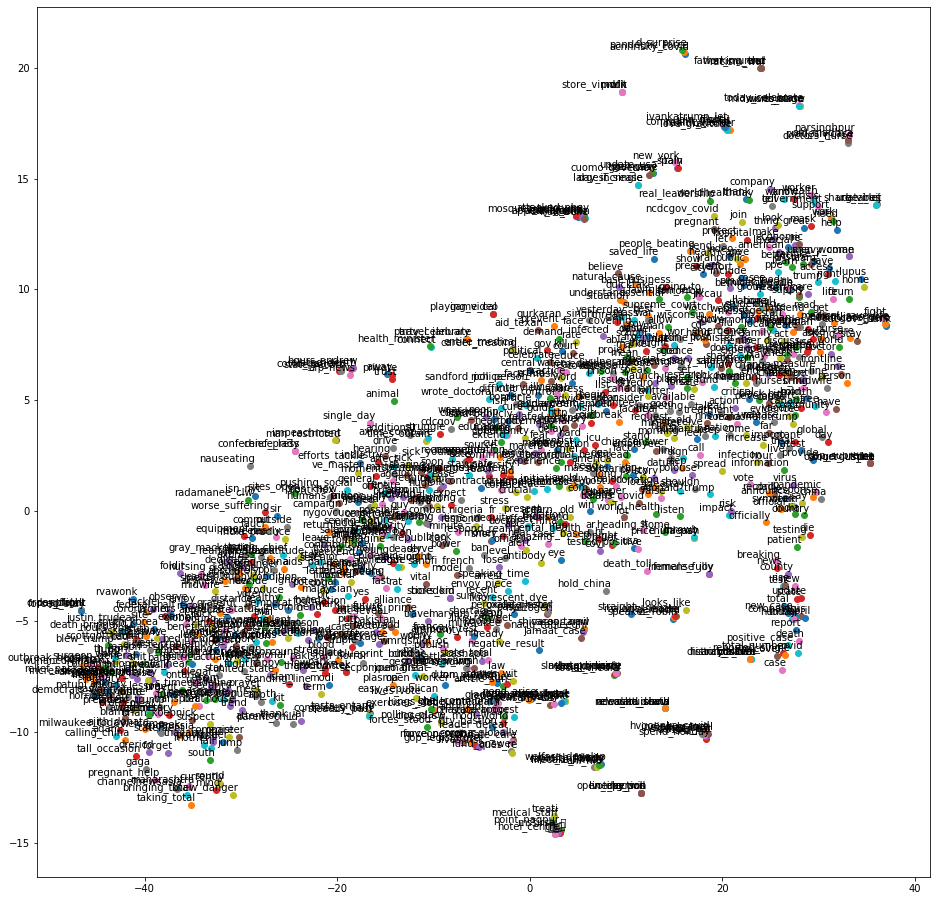

In [162]:

tsne_plot(word2vec,20)  

In [40]:
word_list = [item for sublist in data_processed for item in sublist]
wordfreqs = nltk.probability.FreqDist(w for w in word_list)
mostcommon = wordfreqs.most_common(50)
mostcommon

[('covid', 9436),
 ('person', 1268),
 ('coronavirus', 952),
 ('case', 827),
 ('today', 772),
 ('pandemic', 656),
 ('help', 648),
 ('new', 561),
 ('need', 559),
 ('day', 492),
 ('thank', 479),
 ('death', 478),
 ('work', 471),
 ('protect', 454),
 ('fight', 450),
 ('time', 440),
 ('home', 435),
 ('patient', 395),
 ('say', 388),
 ('health', 384),
 ('don', 364),
 ('worldhealthday', 363),
 ('support', 362),
 ('state', 352),
 ('line_person', 350),
 ('voting_poll', 350),
 ('open_election', 350),
 ('day_wis', 350),
 ('know', 344),
 ('china', 341),
 ('confirm', 321),
 ('update', 317),
 ('report', 301),
 ('test', 299),
 ('stay_safe', 299),
 ('april', 296),
 ('world', 295),
 ('positive', 289),
 ('die', 283),
 ('country', 276),
 ('let', 266),
 ('crisis', 266),
 ('go', 264),
 ('trump', 264),
 ('government', 264),
 ('think', 254),
 ('profit', 250),
 ('spread', 247),
 ('number', 244),
 ('new_york', 242)]

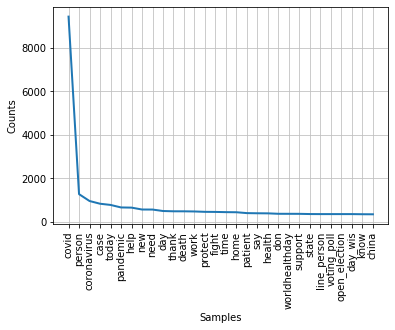

In [41]:
wordfreqs.plot(30)

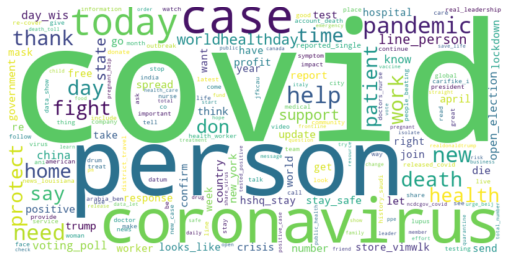

In [43]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(background_color='white',max_font_size=300,width=800,height=400, stopwords= STOPWORDS).generate_from_frequencies(wordfreqs)
# Plotting the wordcloud
plt.figure( figsize=(8,4) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=2)
plt.show()

## Do Automated Topic Analysis (LDA)

In [44]:
from gensim import corpora
# Step 3: Create the Inputs of LDA model: Dictionary and Corpus
dct = corpora.Dictionary(data_processed)
corpus = [dct.doc2bow(line) for line in data_processed]

In [45]:
from gensim.models import LdaModel, LdaMulticore
# Step 4: Train the LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=100,
                         num_topics=4,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

# save the model
lda_model.save('newlda_model.model')

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.063*"covid" + 0.008*"person" + 0.006*"coronavirus" + 0.005*"today" + 0.005*"case" + 0.004*"help" + 0.004*"pandemic" + 0.004*"new" + 0.004*"need" + 0.003*"protect"'),
 (1,
  '0.023*"covid" + 0.010*"looks_like" + 0.009*"real_leadership" + 0.004*"state" + 0.003*"negative_result" + 0.003*"necessary_cho" + 0.003*"person" + 0.003*"upfront" + 0.003*"case" + 0.003*"time"'),
 (2,
  '0.012*"covid" + 0.005*"d_surprise" + 0.005*"pandemic_force" + 0.005*"acnhrisky_covid" + 0.004*"person" + 0.004*"frontli" + 0.004*"love_gratitude" + 0.004*"work" + 0.004*"case" + 0.004*"community_send"'),
 (3,
  '0.003*"gaga" + 0.003*"conference_lady" + 0.003*"chief_press" + 0.003*"l_press" + 0.003*"union_fund" + 0.003*"unioin_fund" + 0.003*"care_care" + 0.003*"fefsi_pro" + 0.003*"furlough_staff" + 0.003*"federal_support"')]